# Introdução

Parabéns! Você é a mais nova cientista de dados da BlueToucan Medical, uma empresa multinacional da área de farmacos para o tratamento diversos tipos de câncer. Em reunião a direção da empresa solicitou que você fosse responsável por avaliar os dados da última pesquisa feita em parceira com os hospitais da Universidade de Wisconsin.

# Problema

Câncer de mama é o tipo de câncer mais comum entre as mulheres no mundo e no Brasil, depois do câncer de pele não melanoma. O câncer de mama responde, atualmente, por cerca de 28% dos casos novos de câncer em mulheres. O câncer de mama também acomete homens, porém é raro, representando menos de 1% do total de casos da doença. Estatísticas indicam aumento da sua incidência tanto nos países desenvolvidos quanto nos em desenvolvimento. Existem vários tipos de câncer de mama. Alguns evoluem de forma rápida, outros, não. A maioria dos casos tem bom prognóstico.

Os executivos da BlueToucan precisam de tomar algumas decisões ligadas a produção de um remédio para combater o câncer de mama. Por isso encomendaram uma análise de dados com você, sua missão é utilizar os dados coletados para extrair o máximo de informação possível sobre as características do câncer, dos indivíduos, onde moram e quais os fatores que aparentam ter relação com a grande quantidade de câncer de mama.

# Os dados

## breast_cancer_data.csv

> mean_radius: raio médio dos caroços retirados<br>
> mean_texture: textura média dos caroços retirados<br>
> mean_perimenter: perímetro médio dos caroços retirados<br>
> mean_area: área média dos caroços retirados<br>
> mean_smoothness: suavidade média dos caroços retirados<br>
> diagnosis: diagnóstico (1 - canceroso, 0 - não canceroso)<br>
> age: idade da paciente<br>
> name: nome da paciente<br>
> zipcode: código da cidade de residência da paciente<br>
> diabetes: paciente diagnosticado com diabetes (0 - sem diabetes, 1 - com diabetes<br>
> family_history: paciente com histórico familiar de câncer de mama<br>

## median_hh_income.csv

> COUNTY: nome da municipalidade<br>
> COUNT: mediana de renda anual<br>

## percentage_no_health_insurance.csv

> COUNTY: nome da municipalidade<br>
> COUNT: porcentagem da população sem plano de saúde<br>

## toxic_air_arsenic.csv

> COUNTY: nome da municipalidade<br>
> POUNDS: quantidade (em pounds) de arsênico liberado no ar.<br>

## wi_county_data.csv

> ZIP: código da cidade<br>
> COUNTY: nome da municipalidade<br>

## wi_regions.txt

> Documento de texto descrevendo regiões e suas respectivas municipalidades.

## WI (geojson)

> Pasta contendo geojson descrevendo o formato de todas as municipalidades.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.arange(36).reshape(6,6)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [223]:
df = pd.DataFrame(arr,columns=['idade','altura','tamanho do pe','salario','cor_do_olho','peso'],
                  index=['nasser','joao','marcelo','maria','joana','raquel'])

In [224]:
df

,idade,altura,tamanho do pe,salario,cor_do_olho,peso
nasser,0,1,2,3,4,5
joao,6,7,8,9,10,11
marcelo,12,13,14,15,16,17
maria,18,19,20,21,22,23
joana,24,25,26,27,28,29
raquel,30,31,32,33,34,35


In [225]:
df.loc['marcelo','salario']

15

In [226]:
arr2 = np.random.uniform(size=6)
arr2

array([0.28944733, 0.93190692, 0.12107622, 0.19428936, 0.46462114,
       0.88184843])

In [227]:
pd.Series(arr2,index=['nasser','joao','marcelo','maria','joana','raquel'],name='salario_normalizado')

nasser     0.289447
joao       0.931907
marcelo    0.121076
maria      0.194289
joana      0.464621
raquel     0.881848
Name: salario_normalizado, dtype: float64

In [228]:
df['tamanho do pe']

nasser      2
joao        8
marcelo    14
maria      20
joana      26
raquel     32
Name: tamanho do pe, dtype: int64

In [229]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
564,10.71,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1
565,12.87,16.21,82.38,512.2,0.09425,1,41,1,Marie Christian,53007,0,1
566,13.59,21.84,87.16,561.0,0.07956,1,43,7,Tracy Morgan,53008,1,1
567,11.74,14.02,74.24,427.3,0.07813,1,48,3,Dawn Smith,53015,0,1
568,7.76,24.54,47.92,181.0,0.05263,1,54,6,Christine Nguyen,53013,0,1


In [230]:
mask = df.mean_radius < 11

In [231]:
df[df.mean_radius < 11].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
158,10.95,21.35,71.90,371.1,0.12270,0,32,0,Shelia Henderson,53011,0,0
214,10.57,20.22,70.15,338.3,0.09073,1,43,4,Aimee Turner,53002,0,1
215,10.80,21.98,68.79,359.9,0.08801,1,43,1,Sophia Johnson,53001,1,0
222,10.48,14.98,67.49,333.6,0.09816,1,52,8,Ashley Wise,53014,0,1
229,10.03,NaN,63.19,307.3,0.08117,1,38,0,Brenda Jones,53016,1,1


In [232]:
df[(df.mean_radius < 11) | (df.diagnosis == 0)]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.990,10.38,122.80,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0
1,14.220,23.12,94.37,609.9,0.10750,0,25,7,Tiffany Miller,53007,0,0
2,12.340,26.86,81.15,477.4,0.10340,0,39,8,Anna Walker,53001,0,1
3,14.860,23.21,100.40,NaN,0.10440,0,30,5,Elizabeth Perkins,53006,0,1
4,13.770,22.29,90.63,588.9,0.12000,0,29,1,Erin Warner,53001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
539,10.200,17.48,65.05,321.2,0.08054,1,48,2,Angela Smith,53014,0,1
544,10.600,18.95,NaN,346.4,0.09688,1,49,3,Mary Moore,53011,0,1
561,9.742,15.67,61.50,289.9,0.09037,1,41,6,Jessica Garcia,53005,0,1
564,10.710,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1


In [233]:
df.shape

(569, 12)

In [234]:
df.zipcode.unique()

array([53013, 53007, 53001, 53006, 53008, 53016, 53011, 53003, 53005,
       53015, 53004, 53010, 53002, 53014, 53012])

In [235]:
"{}{}{}".format(5,22,45)

'52245'

In [236]:
x = 3

f"hoje eu tomei {x} litros de água"

'hoje eu tomei 3 litros de água'

In [237]:
df.query(" zipcode == 53013 & diagnosis == 1").mean_area.var()

14321.646397058823

In [238]:
for zipcode in df.zipcode.unique():
    print(zipcode,df.query(f" zipcode == {zipcode} & diagnosis == 1").mean_area.mean())

53013 489.45294117647063
53007 519.7
53001 431.847619047619
53006 443.0642857142857
53008 489.01000000000005
53016 474.27
53011 448.76562499999994
53003 493.86
53005 441.85
53015 426.22222222222223
53004 457.4222222222222
53010 479.4121951219512
53002 453.44444444444446
53014 417.178947368421
53012 477.825


In [239]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [240]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
564,10.71,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1
565,12.87,16.21,82.38,512.2,0.09425,1,41,1,Marie Christian,53007,0,1
566,13.59,21.84,87.16,561.0,0.07956,1,43,7,Tracy Morgan,53008,1,1
567,11.74,14.02,74.24,427.3,0.07813,1,48,3,Dawn Smith,53015,0,1
568,7.76,24.54,47.92,181.0,0.05263,1,54,6,Christine Nguyen,53013,0,1


In [241]:
df.sample(5,random_state=42,)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
204,14.42,19.77,94.48,642.5,0.09752,0,27,6,Sharon Cherry,53012,0,1
70,20.16,19.66,131.10,1274.0,0.08020,0,26,5,Kimberly Levine,53008,0,1
131,18.61,20.25,122.10,1094.0,0.09440,0,33,8,Michelle Maldonado,53005,0,1
431,13.49,22.30,86.91,561.0,0.08752,1,42,3,Maureen Lewis,53001,1,0
540,11.89,18.35,77.32,432.2,0.09363,1,46,7,Mary Moore,53012,1,1


In [242]:
df3 = pd.DataFrame(np.arange(25).reshape(5,5))

In [243]:
df3.sample(weights=[0.1,0.1,0.1,0.6,0.1])

,0,1,2,3,4
1,5,6,7,8,9


In [244]:
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
268,12.34,12.27,78.94,468.5,0.09003,1,42,8,Angel Brown,53006,0,1
523,11.30,18.19,73.93,389.4,0.09592,1,55,6,Olivia Harris,53001,0,1
271,12.07,13.44,77.83,445.2,0.11000,1,38,4,Emily Higgins,53008,1,0
172,19.27,26.47,127.90,1162.0,0.09401,0,24,2,Brittany Farmer,53005,0,0
447,11.34,21.26,72.48,396.5,0.08759,1,41,5,Kimberly Crosby MD,53016,0,0


## to_datetime

In [245]:
data = pd.date_range('2019-08-01','2020-08-01').values.astype(str)
data = pd.DataFrame(data)
data.columns = ['data_ref']
data['infected'] = np.random.randint(0,125,size=367)

In [246]:
data

,data_ref,infected
0,2019-08-01T00:00:00.000000000,2
1,2019-08-02T00:00:00.000000000,71
2,2019-08-03T00:00:00.000000000,81
3,2019-08-04T00:00:00.000000000,117
4,2019-08-05T00:00:00.000000000,16
...,...,...
362,2020-07-28T00:00:00.000000000,74
363,2020-07-29T00:00:00.000000000,105
364,2020-07-30T00:00:00.000000000,23
365,2020-07-31T00:00:00.000000000,84


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data_ref  367 non-null    object
 1   infected  367 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [248]:
data['data_ref'] = pd.to_datetime(data['data_ref'])

In [249]:
data.head()

,data_ref,infected
0,2019-08-01,2
1,2019-08-02,71
2,2019-08-03,81
3,2019-08-04,117
4,2019-08-05,16


In [250]:
data['dia_da_semana'] = data['data_ref'].dt.dayofweek
data['semana_do_ano'] = data['data_ref'].dt.isocalendar().week
data['ano'] = data['data_ref'].dt.year

In [251]:
data['data_ref'].min()

Timestamp('2019-08-01 00:00:00')

In [252]:
data['data_ref'].max()

Timestamp('2020-08-01 00:00:00')

## Continuando

In [253]:
df.describe(percentiles=[.25, .5, .75])

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,zipcode,diabetes,family_history
count,554.000000,546.000000,548.000000,544.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.108717,19.295952,92.367792,652.674449,0.096360,0.627417,39.216169,3.769772,53008.444640,0.302285,0.479789
std,3.509903,4.289885,24.351585,349.628827,0.014064,0.483918,10.527664,2.578637,4.550674,0.459652,0.500031
min,6.981000,9.710000,47.920000,143.500000,0.052630,0.000000,15.000000,0.000000,53001.000000,0.000000,0.000000
25%,11.682500,16.210000,75.267500,419.525000,0.086370,0.000000,30.000000,1.000000,53005.000000,0.000000,0.000000
50%,13.375000,18.890000,86.735000,548.750000,0.095870,1.000000,41.000000,4.000000,53008.000000,0.000000,0.000000
75%,15.780000,21.807500,105.250000,784.150000,0.105300,1.000000,48.000000,6.000000,53012.000000,1.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000,58.000000,8.000000,53016.000000,1.000000,1.000000


In [254]:
df_vazio = pd.DataFrame([])

In [255]:
df_vazio['age_0'] = df.query("diagnosis == 0").age.describe()
df_vazio['age_1'] = df.query("diagnosis == 1").age.describe()

In [256]:
df_vazio

,age_0,age_1
count,212.000000,357.000000
mean,28.051887,45.845938
std,5.631003,6.303764
min,15.000000,28.000000
25%,24.000000,42.000000
50%,28.000000,46.000000
75%,32.000000,51.000000
max,41.000000,58.000000


In [257]:
ls = [1,2,2,2,2,2,2,2,2,40]

In [258]:
np.mean(ls)

5.7

In [259]:
np.median(ls)

2.0

## Correlação

In [260]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [261]:
df[['mean_radius','mean_texture','mean_perimeter','mean_area','diagnosis']].corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,diagnosis
mean_radius,1.000000,0.324875,0.997812,0.987139,-0.733870
mean_texture,0.324875,1.000000,0.325693,0.316743,-0.416965
mean_perimeter,0.997812,0.325693,1.000000,0.986235,-0.742076
mean_area,0.987139,0.316743,0.986235,1.000000,-0.705188
diagnosis,-0.733870,-0.416965,-0.742076,-0.705188,1.000000


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      554 non-null    float64
 1   mean_texture     546 non-null    float64
 2   mean_perimeter   548 non-null    float64
 3   mean_area        544 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
 6   age              569 non-null    int64  
 7   pregnancies      569 non-null    int64  
 8   name             569 non-null    object 
 9   zipcode          569 non-null    int64  
 10  diabetes         569 non-null    int64  
 11  family_history   569 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 53.5+ KB


In [263]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,zipcode,diabetes,family_history
mean_radius,1.000000,0.324875,0.997812,0.987139,0.165649,-0.733870,-0.584340,-0.050521,-0.035268,-0.210744,-0.275584
mean_texture,0.324875,1.000000,0.325693,0.316743,-0.016475,-0.416965,-0.335382,-0.058911,-0.034255,-0.125740,-0.221870
mean_perimeter,0.997812,0.325693,1.000000,0.986235,0.211912,-0.742076,-0.600677,-0.057125,-0.051525,-0.233816,-0.295255
mean_area,0.987139,0.316743,0.986235,1.000000,0.179204,-0.705188,-0.563556,-0.039865,-0.038528,-0.204727,-0.254880
mean_smoothness,0.165649,-0.016475,0.211912,0.179204,1.000000,-0.358560,-0.275720,-0.010013,-0.008287,-0.141273,-0.089996
diagnosis,-0.733870,-0.416965,-0.742076,-0.705188,-0.358560,1.000000,0.817927,0.025666,0.032190,0.333098,0.354445
age,-0.584340,-0.335382,-0.600677,-0.563556,-0.275720,0.817927,1.000000,0.010981,0.015152,0.303727,0.337449
pregnancies,-0.050521,-0.058911,-0.057125,-0.039865,-0.010013,0.025666,0.010981,1.000000,0.010389,-0.025846,0.054415
zipcode,-0.035268,-0.034255,-0.051525,-0.038528,-0.008287,0.032190,0.015152,0.010389,1.000000,0.056832,0.003569
diabetes,-0.210744,-0.125740,-0.233816,-0.204727,-0.141273,0.333098,0.303727,-0.025846,0.056832,1.000000,0.003648


In [264]:
df.skew()

mean_radius        0.898320
mean_texture       0.632336
mean_perimeter     0.994274
mean_area          1.677038
mean_smoothness    0.456324
diagnosis         -0.528461
age               -0.253929
pregnancies        0.077956
zipcode            0.002226
diabetes           0.863317
family_history     0.081124
dtype: float64

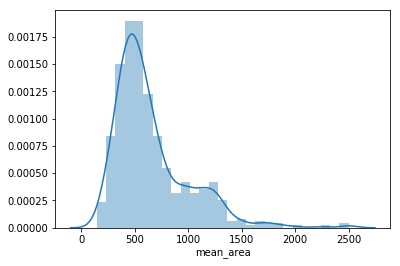

In [265]:
import seaborn as sns

sns.distplot(df['mean_area'])

In [266]:
df.age.mode()

0    47
dtype: int64

In [267]:
df.diagnosis.mode()

0    1
dtype: int64

In [268]:
df.zipcode.mode()

0    53010
dtype: int64

In [269]:
zip_codes = {}

for zipcode in df.zipcode:
    if zipcode in zip_codes.keys():
        zip_codes[zipcode] += 1
    else:
        zip_codes[zipcode] = 1

In [270]:
len(zip_codes.keys())

15

In [271]:
df.mean_smoothness.nunique()

474

In [272]:
df.zipcode.unique()

array([53013, 53007, 53001, 53006, 53008, 53016, 53011, 53003, 53005,
       53015, 53004, 53010, 53002, 53014, 53012])

In [273]:
ls = []

for zipcode in [53010,53002]:
    ls.append((zipcode,df[df.zipcode == zipcode].age.mean()))

In [274]:
## contando

round(df.family_history.value_counts(normalize=True) * 100,2)

0    52.02
1    47.98
Name: family_history, dtype: float64

In [275]:
df.diagnosis.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

In [276]:
nomes = df.name.value_counts()[df.name.value_counts() == 2].index

df[df.name.isin(nomes)]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
106,15.32,17.27,103.20,713.3,0.13350,0,31,2,Kimberly Gibson,53011,0,0
185,21.56,22.39,142.00,1479.0,0.11100,0,21,2,Ashley Smith,53004,0,0
260,13.28,13.72,85.79,541.8,0.08363,1,28,2,Ashley Smith,53010,1,0
485,13.20,15.82,84.07,537.3,0.08511,1,57,5,Kimberly Gibson,53010,1,0
540,11.89,18.35,77.32,432.2,0.09363,1,46,7,Mary Moore,53012,1,1
544,10.60,18.95,NaN,346.4,0.09688,1,49,3,Mary Moore,53011,0,1


In [277]:
ls = df.mean_smoothness > df.mean_smoothness.mean()
df['acima'] = 1

for idx in df[ls].index:
    df.loc[idx,'acima'] = 'acima'

In [278]:
df.mean_smoothness.mean()

0.09636028119507908

In [279]:
def acima_media(value):
    
    media = df.mean_smoothness.mean()
    
    if value > media:
        return 'acima_media'
    else:
        return 'abaixo_media'

In [280]:
df.mean_smoothness.head()

0    0.1184
1    0.1075
2    0.1034
3    0.1044
4    0.1200
Name: mean_smoothness, dtype: float64

In [281]:
df['log_smoothness'] = df.mean_smoothness.apply(np.log)
df['sqrt_smoothness'] = df.mean_smoothness.apply(np.sqrt)

In [282]:
def split_name(value):
    nome = value.split()
    return nome[0]

def last_name(value):
    nome = value.split()
    return nome[1]

In [283]:
df['first_name'] = df.name.apply(split_name)
df['last_name'] = df.name.apply(last_name)

In [284]:
'nasser','boan'

('nasser', 'boan')

In [285]:
'nasser' + 'boan'

'nasserboan'

In [286]:
'nasser' + ' ' + 'boan'

'nasser boan'

In [287]:
df['nome_completo'] = df.first_name + ' ' + df.last_name

In [288]:
df['nova_coluna'] = df.mean_area / df.mean_radius

In [289]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [290]:
df.describe().shape

(8, 14)

In [291]:
df.describe().transpose().shape

(14, 8)

In [297]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [304]:
df[(df.zipcode == 53004)&(df.pregnancies == 4)].age.mean()

nan

In [311]:
df.pivot_table(index='diagnosis',columns='diabetes',values='age',aggfunc='count')

diabetes,0,1
diagnosis,,
0,190,22
1,207,150


In [313]:
150/172

0.872093023255814

In [292]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [214]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [216]:
df.pivot_table(index='C',columns='B',values='D')

B,one,two
C,,
large,2.666667,7.0
small,3.000000,4.0


In [222]:
df[(df.C == 'small')&(df.B == 'two')]

,A,B,C,D,E
3,foo,two,small,3,5
4,foo,two,small,3,6
7,bar,two,small,6,9


In [218]:
df.B.unique()

array(['one', 'two'], dtype=object)